# Preprocessing of the testing dataset

First, all the required libraries are added, then, path and categories have been added.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = '/Users/vishvmac/Machine Learning/Machine learning projects/Intel image classification dataset/intel-image-classification/seg_test/seg_test'
CATEGORIES = ['buildings','forest','glacier','mountain','sea','street']

Now, the path and categories has been combined to define the path to buildings, forest, glacier, mountain, sea, street. The image array has been made by cv2 library. By adding "cv2.IMREAD_GRAYSCALE", the images can be converted to the greyscale and dimensions are be reduced.   
Then, matplotlib.pyplot is used to check the image by plotting. 

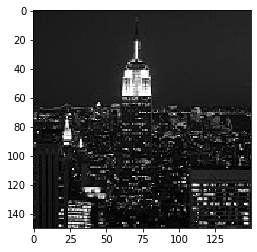

In [34]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)      #path to buildings, forest, glacier, mountain, sea, street dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE )     #making array of images with cv2
        plt.imshow(img_array, cmap = 'gray')     #plotting image with matplotlib.pyplot
        plt.show()
        break
    break

In [35]:
print(img_array.shape)        #printing shape of image array. without grey scale images It will be (150,150,3)

(150, 150)


Below code was written to resize the images with different sizes. In this dataset all the images are already of same sizes (150, 150). But for the dataset of different sizes this code is a must.

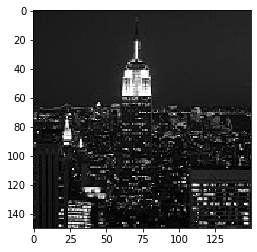

In [36]:
IMG_SIZE =150

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))         #resizing the array with cv2
plt.imshow(new_array, cmap = 'gray')                #plotting image with matplotlib.pyplot
plt.show()

Now, another directory for testing data is created. Then, defining of path and reading of images has been done as above. After that, index of labels has been made and labels has been added to the images in testing dataset directory.

In [37]:
testing_data =[]                #Creating testing dataset directory to add labels to images
def create_testing_data():      #Defining testing data directory
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to buildings, forest, glacier, mountain, sea, street dir
        class_num = CATEGORIES.index(category)  #making index of labels for images
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE )   #reading the images in cv2
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))                    #resizing images
                testing_data.append([new_array, class_num])     #Adding labels to the images in final testing data
            except Exception as e:
                pass
            
            
create_testing_data()

Creating class for features as X_test and labels as y_test. And then deviding the testing dataset into features and classification as X_test and y_test.

In [38]:
X_test = []
y_test = []

In [39]:
for features, label in testing_data:            #deviding testing dataset in features and labels as X_test and y_test.
    X_test.append(features)
    y_test.append(label)
    
X_test= np.array(X_test).reshape(-1, IMG_SIZE,IMG_SIZE, 1)    #reshaping X_test

Now, here pickle is been used to store the preprocesses data in terms of features and labels so that, it will be handy to test in machine learning model.

In [40]:
import pickle

pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

Below is the procedure for loading the stored X_test and y_test data.

In [41]:
pickle_in = open("X_test.pickle", "rb")
X_test= pickle.load(pickle_in)

pickle_in = open("y_test.pickle", "rb")
y_test= pickle.load(pickle_in)